In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#load the dataset:
mnist = tf.keras.datasets.mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
xtrain, xtest = xtrain/255.0, xtest/255.0
print("xtrain shape: ", xtrain.shape)
i = Input(shape=xtrain[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)
model = Model(i,x)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(xtrain, ytrain, validation_data=(xtest,ytest), epochs=10)

11490434/11490434 [==============================] - 1s 0us/step
xtrain shape:  (60000, 28, 28)
Epoch 1/10
1875/1875 [==============================] - 86s 45ms/step - loss: 0.3323 - accuracy: 0.8927 - val_loss: 0.1132 - val_accuracy: 0.9659
Epoch 2/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.1002 - accuracy: 0.9701 - val_loss: 0.0738 - val_accuracy: 0.9774
Epoch 3/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0658 - accuracy: 0.9803 - val_loss: 0.0551 - val_accuracy: 0.9832
Epoch 4/10
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0528 - accuracy: 0.9833 - val_loss: 0.0647 - val_accuracy: 0.9809
Epoch 5/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0420 - accuracy: 0.9873 - val_loss: 0.0512 - val_accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0378 - accuracy: 0.9881 - val_loss: 0.0527 - val_accuracy: 0.9848
Epoch 7/10
1875/1875 [======

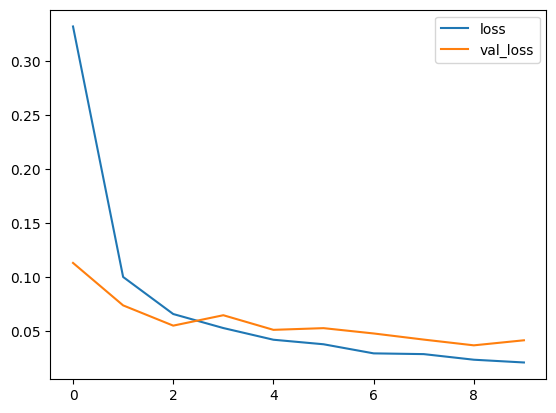

In [ ]:
#plot the loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

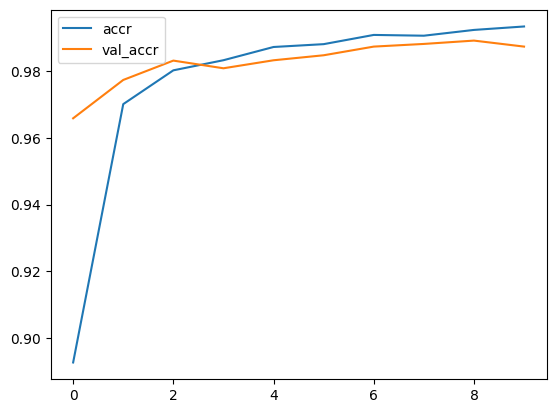

In [ ]:
#plot the accuracy per iteration
plt.plot(r.history['accuracy'], label='accr')
plt.plot(r.history['val_accuracy'], label='val_accr')
plt.legend()

313/313 [==============================] - 7s 20ms/step
confusion matrix without normalisation
[[ 974    0    0    0    0    0    5    1    0    0]
 [   1 1125    3    1    0    1    2    1    1    0]
 [   2    0 1020    3    0    1    1    3    2    0]
 [   0    0    1 1006    0    3    0    0    0    0]
 [   0    0    0    0  955    0    3    2    2   20]
 [   1    0    0    6    1  878    4    1    1    0]
 [   0    4    0    0    7    2  944    0    1    0]
 [   0    2    4    3    1    0    0 1010    0    8]
 [   0    0    1    1    0    1    1    1  968    1]
 [   0    0    0    0    5    3    1    2    4  994]]


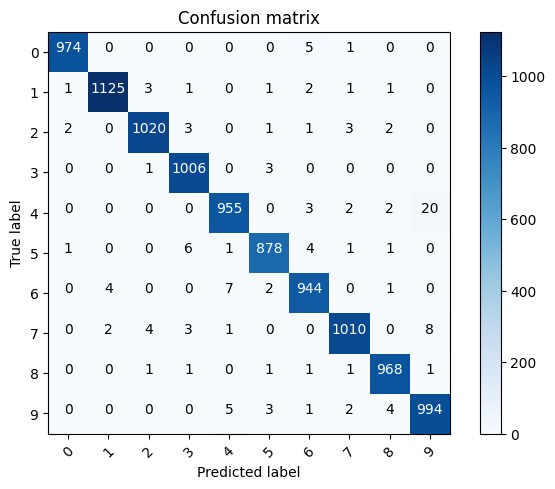

In [ ]:
#confusion matrix plotted with the missclassified sample:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("normalised confusion matrix")
    else:
        print("confusion matrix without normalisation")
    print(cm)
    plt.imshow(cm,interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tickmarks = np.arange(len(classes))
    plt.xticks(tickmarks,classes,rotation=45)
    plt.yticks(tickmarks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

ptest = model.predict(xtest).argmax(axis=1)
cm = confusion_matrix(ytest,ptest)
plot_confusion_matrix(cm,list(range(10)))

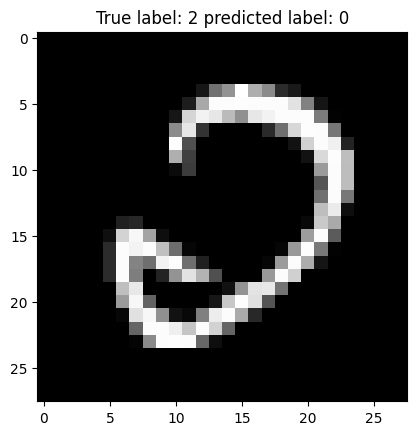

In [ ]:
miss = np.where(ptest!=ytest)[0]
i = np.random.choice(miss)
plt.imshow(xtest[i],cmap='gray')
plt.title("True label: %s predicted label: %s" % (ytest[i], ptest[i]));